In [ ]:
# Author: Kevin Richard (101744371 ), Tanishq Venkata Satya Sri Pavan Sadanala (101745449 )
# Date: 11 Mar 2023
# Assignment 2
# Course: CPS - 592

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer

nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

!pip install tld
import tld
from tld import get_tld, is_tld
!pip install colorama
from colorama import Fore
from urllib.parse import urlparse
import math
from collections import Counter
import re

import seaborn as sb
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
#Task 1

df= pd.read_csv("phishing_site_urls.csv")
print(df.shape)
df.head()

(549346, 2)


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


['bad' 'good']
[156422 392924]


<BarContainer object of 2 artists>

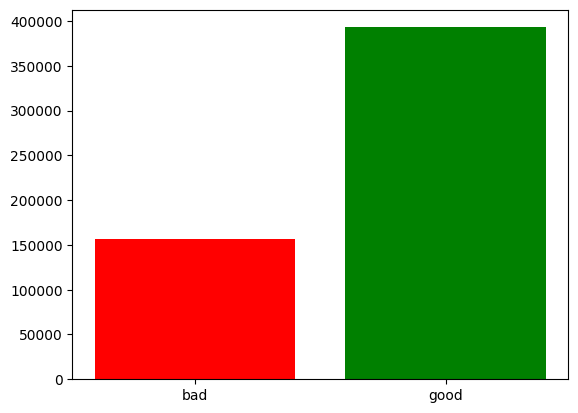

In [ ]:
x=df.Label.unique()
print(x)
y=np.array([df[df['Label']=='bad'].count()[0],df[df['Label']=='good'].count()[0]])
print(y)

plt.bar(x,y,color=[ 'red', 'green'])


In [ ]:
# Check for null values in the dataset

if df.isnull().any().any():
    print("There are null values in the dataset")
else:
    print("There are no null values in the dataset")

There are no null values in the dataset


In [ ]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
# Check for duplicate values and drop if any

print("Number of duplicate values:",df.URL.duplicated().sum())
df.drop(df[df.URL.duplicated() == True].index, axis = 0, inplace = True)
df = df.reset_index(drop=True)
print("Number of Duplicates after droping:",df.URL.duplicated().sum())

Number of duplicate values: 42151
Number of Duplicates after droping: 0


In [ ]:
df['clean_url']=df.URL.astype(str)
df['clean_url'] = df['clean_url'].str.replace("'", "")

In [ ]:
# Tokenizing and Lemmatizing the URL

tok= RegexpTokenizer(r'[A-Za-z0-9]+')
df['list_url']=df.clean_url.map(lambda x: tok.tokenize(x))

wnl = WordNetLemmatizer()
df['lem_url'] = df['list_url'].map(lambda x: [wnl.lemmatize(word) for word in x])

In [ ]:
df.head()

,URL,Label,clean_url,list_url,lem_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobell.it/70ffb52d079109dca5664cce6f317373782/...,"[nobell, it, 70ffb52d079109dca5664cce6f3173737...","[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbys.com/paypal.cgi.bin.get-into.herf....,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,mail.printakid.com/www.online.americanexpress....,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydregs.com/wp-content/themes/widescre...,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydregs, com, wp, content, theme, wid..."


In [ ]:
# TFID vectorizing the urls

word_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features =200)

unigramdataGet= word_vectorizer.fit_transform(df['lem_url'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
x=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
x[x>0] = 1

In [ ]:
x.head()

,01,02,03,04,05,06,07,08,09,10,...,wiki,wikia,wikipedia,with,wn,wordpress,wp,www,yahoo,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Features using CountVectorizer

# cv = CountVectorizer()
# feature = cv.fit_transform(df.lem_url.astype('str'))
# print(feature)

In [ ]:
# Creating the Y label
y=df.Label
y=np.where(y=='bad',0,1)

In [ ]:
# Creating Test and Training datasets

x_new = StandardScaler().fit_transform(x)

x_train,x_test,y_train,y_test =  train_test_split(x_new,y,random_state=42,test_size=0.2,shuffle=True)

train_size, num_features = x_train.shape
test_size, test_features = x_test.shape

In [ ]:
LR_sklearn_model = LogisticRegression()
LR_sklearn_model.fit(x_train, y_train)

# Make predictions on the testing set
LR_y_pred = LR_sklearn_model.predict(x_test)

# Evaluate the performance of the model using accuracy score
sklearn_LRaccuracy = accuracy_score(y_test, LR_y_pred)
print("Accuracy:", sklearn_LRaccuracy)

In [ ]:
svm_sklearn_model = LinearSVC().fit(x_train, y_train)

# make predictions on the test set
svm_y_pred = svm_sklearn_model.predict(x_test)

# calculate accuracy
sklearn_SVMaccuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", sklearn_SVMaccuracy)

In [ ]:
def svm_accuracy(Output_values,y_data):
  accuracy1 = 0
  # number of correct predictions
  for i in range(len(y_data)):
    if Output_values[i] >= 0:
      predicted_y = 1
    else:
      predicted_y = 0
    eq = tf.cast(tf.equal(predicted_y, y_test[i]), tf.float32)  # eq is 0 if model does not predict correctly, or 1 if correctly
    accuracy1 = accuracy1 + eq.numpy()

  return accuracy1/len(y_data)

# accuracy function
def LR_accuracy(Output_values,y_data):
  accuracy1 = 0
  # number of correct predictions
  for i in range(len(y_data)):
    if Output_values[i] >= 0.5:
      predicted_y = 1
    else:
      predicted_y = 0
    eq = tf.cast(tf.equal(predicted_y, y_test[i]), tf.float32)  # eq is 0 if model does not predict correctly, or 1 if correctly
    accuracy1 = accuracy1 + eq.numpy()

  return accuracy1/len(y_data)

In [ ]:
#Logistic regression Model
class LogisticRegressionModel(object):

    def __init__(self, num_features):
        self.W = tf.Variable(tf.random.normal(shape=[num_features, 1])) # a column vector, initial weights follow the standard normal distribution
        self.b = tf.Variable(tf.random.normal(shape=[1, 1]))  # bias is a single value

    def __call__(self, X): # instance is called via this method: after e is created, call: e() <-- __call__ method will be called
        return self.likelihood(X)

    def likelihood(self, X): # where all the predicting and training happens
      X = tf.cast(X, dtype=tf.float32)
      raw_Y = tf.matmul(X, self.W) + self.b
      return tf.math.sigmoid(raw_Y)  # 1./(1. + tf.exp(-raw_Y)) is just the sigmoid function

    def predict(self, X): # prediction function
      p = self.likelihood(X)
      return p

# the loss function
def LR_compute_loss(y_pred, y_true):
  epsilon=1e-7
  y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
  loss = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
  return loss

In [ ]:
# Define a training loop:
def LR_training_loop(epochs,BATCH_SIZE,learning_rate):
  LR_model = LogisticRegressionModel(num_features)
  for i in epochs:
    rand_index = np.random.choice(train_size, size = BATCH_SIZE) # generate 100 random indices
    X = x_train[rand_index]  # given 100 random indices, choose 100 data points from train_data
    Y = np.transpose([y_train[rand_index]])  # get their true y values for those 100 data points

    with tf.GradientTape() as tape:
      loss = LR_compute_loss(LR_model(X), Y)  # compute the loss based on the model output and the true Y
      #loss = tf.keras.losses.BinaryCrossentropy()(Y, model(X)) # keras model for computing loss

    dW, db = tape.gradient(loss, [LR_model.W, LR_model.b])
    LR_model.W.assign_sub(learning_rate * dW)
    LR_model.b.assign_sub(learning_rate * db)


    # print epoch and loss value every 100th iteration.
    if i % 100 == 0:
      print("=> epoch %2d: loss= %.2f" %(i, loss.numpy()))

##############  training is finished !!  ################3

  # predict values for x_test data set
  predicted_values = LR_model.predict(x_test) # predicted labels are probabilities

  lr_acc=LR_accuracy(predicted_values,y_test)
  # Accuracy of test Data:
  print("accuracy:",lr_acc)
  return lr_acc

In [ ]:
#Support Vector Model
class SupportVectorModel(object):

    def __init__(self, num_features):
        self.W = tf.Variable(tf.random.normal(shape=[num_features, 1]))
        self.b = tf.Variable(tf.random.normal(shape=[1, 1]))
        self.C = 0.001

    def __call__(self, X):
        return self.likelihood(X)

    def likelihood(self, X):
      X = tf.cast(X, dtype=tf.float32)
      raw_Y = tf.matmul(X, self.W) + self.b
      return raw_Y


    def predict(self, X):
      p = self.likelihood(X)
      return p

    # the loss function
    def compute_loss(self,y_pred, y_true):
      c_loss = 0.5 * tf.matrix_square_root(tf.matmul(tf.transpose(self.W),self.W))
      hinge_loss = tf.maximum(0, 1 - y_true * y_pred)
      loss = self.C*c_loss + hinge_loss

      return tf.reduce_mean(loss)

In [ ]:
# Define a training loop:
def SVM_training_loop(epochs,BATCH_SIZE,learning_rate):
  epoch_plot = []
  loss_plot = []
  svm_model = SupportVectorModel(num_features)
  for i in epochs:
    rand_index = np.random.choice(train_size, size = BATCH_SIZE) # generate 100 random indices
    X = x_train[rand_index]  # given 100 random indices, choose 100 data points from train_data
    Y = np.transpose([y_train[rand_index]])  # get their true y values for those 100 data points
    Y = tf.reshape(Y, (-1, 1))  #new

    Y_label = np.where(Y <= 0, -1, 1)

    with tf.GradientTape() as tape:
      loss = svm_model.compute_loss(svm_model(X), Y_label) # compute the loss based on the model output and the true Y

    dW, db = tape.gradient(loss, [svm_model.W, svm_model.b])
    svm_model.W.assign_sub(learning_rate * dW)
    svm_model.b.assign_sub(learning_rate * db)

    # print epoch and loss value every 100th iteration.
    if i % 100 == 0:
      print("=> epoch %2d: loss= %.2f" %(i, loss.numpy()))
      epoch_plot.append(i)


##############  training is finished !!  ################3

  # predict values for x_test data set
  predicted_values = svm_model.predict(x_test) # predicted labels are probabilities

  svm_acc = svm_accuracy(predicted_values,y_test)
  # Accuracy of test Data:
  print("accuracy:",svm_acc)
  return svm_acc

In [ ]:
LR_accuracy_before = LR_training_loop(range(2000),2000,1)

In [ ]:
LR_accuracy_comp = [LR_accuracy_before, sklearn_LRaccuracy]

plt.bar(np.arange(len(LR_accuracy_comp)), LR_accuracy_comp)

plt.title('Accuracy comparison')
plt.xlabel('Own code vs sklearn')
plt.ylabel('Accuracy')
y_max = max(LR_accuracy_comp) + 0.02
y_min = min(LR_accuracy_comp) - 0.05
plt.ylim(y_min, y_max)
plt.legend()

# show plot
plt.show()

In [ ]:
SVM_accuracy_before = SVM_training_loop(range(2000),200,0.2)

In [ ]:
SVM_accuracy_comp = [SVM_accuracy_before, sklearn_SVMaccuracy]

plt.bar(np.arange(len(SVM_accuracy_comp)), SVM_accuracy_comp)

plt.title('Accuracy comparison')
plt.xlabel('Own code vs sklearn')
plt.ylabel('Accuracy')
y_max = max(SVM_accuracy_comp) + 0.02
y_min = min(SVM_accuracy_comp) - 0.05
plt.ylim(y_min, y_max)
plt.legend()

# show plot
plt.show()

In [ ]:
# Functions to find the features

def process_tld(url):
    try:
        #Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= ""
    return pri_domain

def entropy(url):
    """Calculate the entropy of a domain name."""
    domain = process_tld(url)
    n = len(domain)
    counts = Counter(domain)
    probs = [float(c) / n for c in counts.values()]
    return -sum(p * math.log(p, 2) for p in probs)

def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        return 1
    else:
        return 0

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebay|webscr|promo|bill|private|cookie|cache|bonus|payment|refund|system|track',url)
    if match:
        return 1
    else:
        return 0

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def Shortening_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

def digits_in_hostname(url):
    domain = process_tld(url)
    digits = 0
    for i in domain:
        if i.isnumeric():
            digits = digits + 1
    return digits

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0


In [ ]:
# Features used

x['url_length'] = df['clean_url'].apply(lambda i: len(str(i)))

x['domain_entropy'] = df['clean_url'].apply(lambda i: entropy(i))

feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//','/','http','https']
for a in feature:
    x[a] = df['clean_url'].apply(lambda i: i.count(a))

x['sus_words'] = df['clean_url'].apply(lambda i: suspicious_words(i))

x['https'] = df['clean_url'].apply(lambda i: httpSecure(i))

x['digits']= df['clean_url'].apply(lambda i: digit_count(i))

x['letters']= df['clean_url'].apply(lambda i: letter_count(i))

x['Shortening_Service'] = df['clean_url'].apply(lambda x: Shortening_Service(x))

x['having_ip_address'] = df['clean_url'].apply(lambda i: having_ip_address(i))

x['fd_length'] = df['clean_url'].apply(lambda i: fd_length(i))

x['digits_in_hostname'] = df['clean_url'].apply(lambda i: digits_in_hostname(i))

x['abnormal_url'] = df['clean_url'].apply(lambda i: abnormal_url(i))


In [ ]:
# New features

x.iloc[:,-25:]

In [ ]:
# New training and testing dataset

x_new = StandardScaler().fit_transform(x)

x_train,x_test,y_train,y_test =  train_test_split(x_new,y,random_state=42,test_size=0.2,shuffle=True)

train_size, num_features = x_train.shape
test_size, test_features = x_test.shape

In [ ]:
LR_accuracy_after = LR_training_loop(range(2000),200,0.2)

In [ ]:
SVM_accuracy_after = SVM_training_loop(range(2000),200,0.2)

In [ ]:
# another way to use keras's functional API:

# using keras functional API
dnn = tf.keras.Sequential()

# add layers:
dnn.add(tf.keras.layers.Dense(128, activation='relu')) # first hidden layer
dnn.add(tf.keras.layers.Dense(100, activation='relu')) # second hidden layer
dnn.add(tf.keras.layers.Dense(80, activation='sigmoid')) # Third hidden layer
dnn.add(tf.keras.layers.Dense(40, activation='relu')) # Fourth hidden layer
dnn.add(tf.keras.layers.Dense(2, activation='softmax')) # output layer has two neurals with softmax function, which corresponding to probabilities


In [ ]:
# step 2: Compile the model: compile sets the training parameters
dnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # choose the loss function for the deep neural network
              metrics=['accuracy'])

In [ ]:
# step 3: training:
dnn.fit(x_train, y_train, epochs=10) # 1 epoch --> accuracy 93%, 10 epochs --> 97.2%!

dnn.summary()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12680/12680 [==============================] - 58s 4ms/step - loss: 0.2211 - accuracy: 0.9123
Epoch 2/10
12680/12680 [==============================] - 44s 3ms/step - loss: 0.2079 - accuracy: 0.9175
Epoch 3/10
12680/12680 [==============================] - 39s 3ms/step - loss: 0.2037 - accuracy: 0.9185
Epoch 4/10
12680/12680 [==============================] - 40s 3ms/step - loss: 0.2011 - accuracy: 0.9199
Epoch 5/10
12680/12680 [==============================] - 40s 3ms/step - loss: 0.1994 - accuracy: 0.9204
Epoch 6/10
12680/12680 [==============================] - 40s 3ms/step - loss: 0.1980 - accuracy: 0.9211
Epoch 7/10
12680/12680 [==============================] - 40s 3ms/step - loss: 0.1969 - accuracy: 0.9215
Epoch 8/10
12680/12680 [==============================] - 40s 3ms/step - loss: 0.1962 - accuracy: 0.9216
Epoch 9/10
12680/12680 [==============================] - 49s 4ms/step - loss: 0.1960 - accuracy: 0.9218
Epoch 10/10
12680/12680 [==============================] - 48s 4ms

In [ ]:
def accuracDNN(Output_values,y_data):
  accuracy1 = 0
  # number of correct predictions
  for i in range(len(y_data)):
    if Output_values[0][0] >=0.5:
      predicted_y = 0
    else:
      predicted_y = 1
    eq = tf.cast(tf.equal(predicted_y, y_test.iloc[i,0]), tf.float32) # eq is 0 if model does not predict correctly, or 1 if correctly
    accuracy1 = accuracy1 + eq.numpy()

  return accuracy1/len(y_data)

In [ ]:
# after training:

predicted_values = dnn.predict(x_test)
DNN_accuracy = accuracDNN(predicted_values,y_test)
print("accuracy:",DNN_accuracy)

3170/3170 [==============================] - 7s 2ms/step


In [ ]:
predicted_values

array([[3.5485768e-01, 6.4514238e-01],
       [9.9434078e-01, 5.6592319e-03],
       [9.9993163e-01, 6.8263973e-05],
       ...,
       [1.7390461e-01, 8.2609540e-01],
       [4.0485064e-04, 9.9959511e-01],
       [1.8317677e-01, 8.1682324e-01]], dtype=float32)

In [ ]:
# bar plot accuracy

Method = ["LR","SVM","NN"]

accuracy_after = [LR_accuracy_after, SVM_accuracy_after, DNN_accuracy]

plt.bar(np.arange(len(Method)), accuracy_after, label='accuracies')

plt.title('Accuracy comparison')
y_max = max(accuracy_after) + 0.02
y_min = min(accuracy_after) - 0.05
plt.ylim(y_min, y_max)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(Method)), Method)
plt.legend()

# show plot
plt.show()

NameError: ignored